In [70]:
%matplotlib inline

# ALE meta-analysis

In [71]:
import os
import nibabel as nib

import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map
from nimare.io import convert_sleuth_to_dataset
from nimare.utils import get_resource_path

from nimare.correct import FWECorrector
from nimare.meta.cbma import ALE

In [72]:
_dset_folder = r'../data_db/dataset_ale/'
_nii_folder = r'../data_db/nifti-ale/'

## ALE Working Memory: visual task stimulus and task modality n-task

In [73]:
wm_sel1_file = os.path.join(os.path.abspath(_dset_folder), "select1_wm.txt")
wm_sel1_dset = convert_sleuth_to_dataset(wm_sel1_file)

In [74]:
wm_sel1_dset.coordinates

,id,study_id,contrast_id,x,y,z,space
94,Beneventi et al-An fMRI study of working memor..,Beneventi et al,An fMRI study of working memor..,24.0,-52.0,43.0,ale_2mm
95,Beneventi et al-An fMRI study of working memor..,Beneventi et al,An fMRI study of working memor..,0.0,21.0,43.0,ale_2mm
117,Beneventi et al-An fMRI study of working memor..,Beneventi et al,An fMRI study of working memor..,-40.0,39.0,9.0,ale_2mm
116,Beneventi et al-An fMRI study of working memor..,Beneventi et al,An fMRI study of working memor..,44.0,-55.0,-14.0,ale_2mm
115,Beneventi et al-An fMRI study of working memor..,Beneventi et al,An fMRI study of working memor..,-36.0,-75.0,-16.0,ale_2mm
...,...,...,...,...,...,...,...
34,Taylor et al-A functional neuroimaging stud..,Taylor et al,A functional neuroimaging stud..,24.0,10.0,46.0,ale_2mm
33,Taylor et al-A functional neuroimaging stud..,Taylor et al,A functional neuroimaging stud..,34.0,4.0,42.0,ale_2mm
32,Taylor et al-A functional neuroimaging stud..,Taylor et al,A functional neuroimaging stud..,36.0,0.0,54.0,ale_2mm
30,Taylor et al-A functional neuroimaging stud..,Taylor et al,A functional neuroimaging stud..,-26.0,8.0,60.0,ale_2mm


In [75]:
# ale = ALE(null_method="montecarlo",n_iters=100,n_cores=8)
ale = ALE(null_method="approximate")
wm_sel1_results = ale.fit(wm_sel1_dset)
corr = FWECorrector(method="montecarlo", voxel_thresh=0.001, n_iters=100, n_cores=8)
wm_sel1_corrected_results = corr.transform(wm_sel1_results)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.
100%|██████████| 100/100 [00:08<00:00, 12.43it/s]
INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


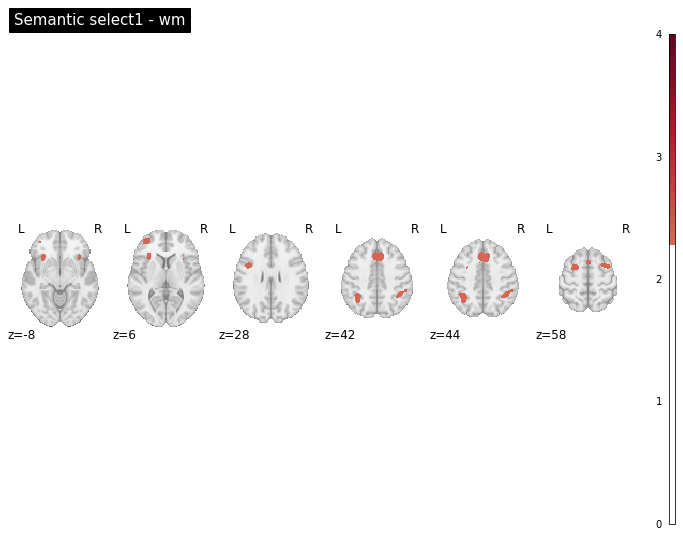

In [76]:
map_name = "z_desc-size_level-cluster_corr-FWE_method-montecarlo"
fig, axes = plt.subplots(figsize=(12, 10), nrows=1)
wm_sel1_img = wm_sel1_corrected_results.get_map(
    map_name
)

plot_stat_map(
    wm_sel1_img,
    cut_coords=6,
    display_mode="z",
    title="Semantic select1 - wm",
    threshold=2.326,  #'auto' # cluster-level p < .01, one-tailed
    cmap="RdBu_r",
    vmax=4,
    axes=axes,
    figure=fig,
)


## Save img to nifti

In [77]:
img_name = 'img_wm_sel1'
nib.save(wm_sel1_img, os.path.join(os.path.abspath(_nii_folder), img_name + '.nii'))
nib.save(wm_sel1_corrected_results.get_map('z'), os.path.join(os.path.abspath(_nii_folder), img_name + '-z.nii'))

## Statistics

In [78]:
from nimare.diagnostics import FocusCounter

counter = FocusCounter(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
test1_count_table, _ = counter.transform(wm_sel1_corrected_results)
test1_count_table.shape

100%|██████████| 12/12 [00:00<00:00, 31.22it/s]


(13, 13)

In [79]:
test1_count_table

,1,2,3,4,5,6,7,8,9,10,11,12,13
Cluster ID,,,,,,,,,,,,,
Center of Mass,"(44, -47, 44)","(39, 43, 20)","(31, 5, 54)","(32, 22, -1)","(20, -67, 53)","(1, 19, 46)","(-22, -66, 44)","(-27, 2, 53)","(-31, 22, -1)","(-37, -52, 46)","(-36, 51, 5)","(-41, 23, 27)","(-44, 6, 28)"
Beneventi et al-An fMRI study of working memor..,0,0,1,1,0,1,0,0,1,1,0,0,1
Carrion et al-Frontal Hypoactivation on Func..,2,1,0,2,1,1,2,2,2,3,2,0,0
Di et al-Anterior cingulate cortex diff..,0,0,1,0,1,0,1,1,1,0,2,0,1
Drobyshevsky et al-A Rapid fMRI Task Battery for ..,1,0,1,0,1,1,1,1,0,1,0,1,0
Duggirala et al-Stimulus-dependent modulation ..,0,2,0,6,0,4,0,1,4,9,0,4,4
Lee et al-Abnormal neural activity in pa..,1,0,0,1,0,3,1,2,1,2,2,0,1
Padilla et al-Long-term brain effects of N-b..,3,0,1,0,0,3,0,2,1,1,1,1,1
Pochon et al-The neural system that bridges..,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
test2_jackknife_table, _ = jackknife.transform(wm_sel1_corrected_results)
test2_jackknife_table.head(10)

100%|██████████| 12/12 [00:14<00:00,  1.23s/it]


,1,2,3,4,5,6,7,8,9,10,11,12,13
Cluster ID,,,,,,,,,,,,,
Center of Mass,"(44, -47, 44)","(39, 43, 20)","(31, 5, 54)","(32, 22, -1)","(20, -67, 53)","(1, 19, 46)","(-22, -66, 44)","(-27, 2, 53)","(-31, 22, -1)","(-37, -52, 46)","(-36, 51, 5)","(-41, 23, 27)","(-44, 6, 28)"
Beneventi et al-An fMRI study of working memor..,0.000986,0.148047,0.136213,0.141558,0.000044,0.073422,0.010077,0.045653,0.118885,0.030967,0.002741,0.000883,0.139598
Carrion et al-Frontal Hypoactivation on Func..,0.193804,0.202713,0.033945,0.145712,0.182888,0.079911,0.226344,0.121806,0.106113,0.145739,0.128923,0.001843,0.05044
Di et al-Anterior cingulate cortex diff..,0.0,0.0,0.099101,0.000065,0.296161,0.0,0.11373,0.082238,0.113357,0.0,0.209902,0.0,0.136414
Drobyshevsky et al-A Rapid fMRI Task Battery for ..,0.148168,0.001587,0.116434,0.0,0.234755,0.047744,0.208453,0.107715,0.000015,0.086922,0.05263,0.341435,0.000105
Duggirala et al-Stimulus-dependent modulation ..,0.0,0.146416,0.0,0.422739,0.0,0.140564,0.004974,0.119385,0.216811,0.237399,0.0,0.351791,0.260357
Lee et al-Abnormal neural activity in pa..,0.081079,0.090136,0.025759,0.109317,0.006719,0.118903,0.211556,0.147306,0.054725,0.121588,0.118226,0.001161,0.126726
Padilla et al-Long-term brain effects of N-b..,0.307549,0.04315,0.120583,0.004742,0.002296,0.129618,0.000119,0.163411,0.059828,0.088968,0.156594,0.297134,0.11409
Pochon et al-The neural system that bridges..,0.00022,0.0,0.003038,0.0,0.045851,0.005298,0.0,0.000004,0.014137,0.0,0.0614,0.000047,0.000319
